# <center>  Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [63]:

df = pd.read_csv('./data.csv',sep=',')


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [64]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [65]:
for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [66]:
df[categorical].isnull().sum()


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [67]:

print(df.workclass.unique())
df.replace(' ?', np.NaN,inplace=True)
df.workclass.value_counts()


[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [68]:
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)  


workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [69]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
cols = X_train.columns
X_test = encoder.transform(X_test)

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

# Dane testowe

In [70]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred


c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score: 0.8083
Training set score: 0.8067
Test set score: 0.8083

c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(



Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


Text(0.5, 1.0, 'Wykres macierzy błędu dla danych testowych')

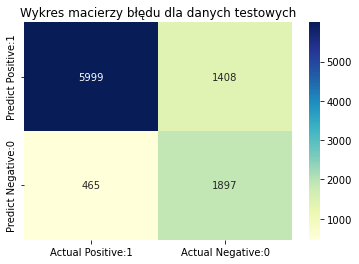

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure()
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Wykres macierzy błędu dla danych testowych')

# Dane Treningowe

In [72]:
y_pred_treningowe = gnb.predict(X_train)

y_pred_treningowe

c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

Model accuracy score: 0.8067
Training set score: 0.8067


c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Test set score: 0.8083
Confusion matrix

 [[13975  3338]
 [ 1067  4412]]

True Positives(TP) =  13975

True Negatives(TN) =  4412

False Positives(FP) =  3338

False Negatives(FN) =  1067


Text(0.5, 1.0, 'Wykres macierzy błędu dla danych treningowych')

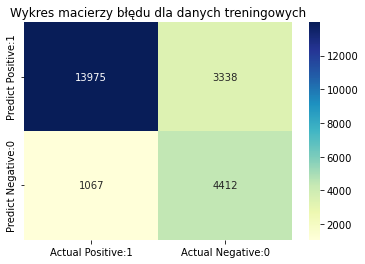

In [73]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_treningowe)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
cm = confusion_matrix(y_train, y_pred_treningowe)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure()
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Wykres macierzy błędu dla danych treningowych')

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [74]:


X = df[['race','native_country']]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

for df2 in [X_train, X_test]:
    df2['race'].fillna(X_train['race'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)  

encoder = ce.OneHotEncoder(cols=['race','native_country'])

X_train = encoder.fit_transform(X_train)
cols = X_train.columns
X_test = encoder.transform(X_test)

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)


native_country 0.018164268164268166


c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

# Dane testowe

In [75]:

y_pred = gnb.predict(X_test)

y_pred


c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score: 0.2910
Training set score: 0.2910
Test set score: 0.2910


c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Confusion matrix

 [[ 534 6873]
 [  53 2309]]

True Positives(TP) =  534

True Negatives(TN) =  2309

False Positives(FP) =  6873

False Negatives(FN) =  53


Text(0.5, 1.0, 'Wykres macierzy błędu dla danych testowych')

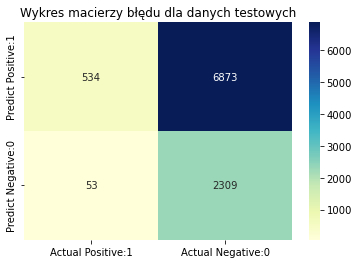

In [76]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure()
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Wykres macierzy błędu dla danych testowych')

# Dane treningowe

In [77]:

y_pred_treningowe = gnb.predict(X_train)

y_pred_treningowe

c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score: 0.2910
Training set score: 0.2910


c:\Users\HP\.conda\envs\witoldszydlo\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Test set score: 0.2910
Confusion matrix

 [[ 1264 16049]
 [  110  5369]]

True Positives(TP) =  1264

True Negatives(TN) =  5369

False Positives(FP) =  16049

False Negatives(FN) =  110


Text(0.5, 1.0, 'Wykres macierzy błędu dla danych treningowych')

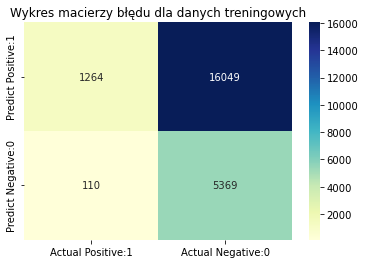

In [78]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_treningowe)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))
cm = confusion_matrix(y_train, y_pred_treningowe)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure()
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Wykres macierzy błędu dla danych treningowych')

# Wnioski

* Any poprawnie przeprowadzić doświadczenie należało skupić się na poprawnej obróbce zbioru danych, aby nie było w nim pustych bądź niezdefiniowanych wartości.
* W ćwiczeniu po raz kolejny mogliśmy zobaczyć skuteczność uczenia maszynowego w przypadku chęci klasyfikowania danych w grupy oraz przewidywaniu wyników.
* Aby można było przetworzyć dane tekstowe w analizowanym problemie dane te zostały przekodowane na wartości liczbowe z pomocą biblioteki category_encoders.
* Z wykresów macierzy błędu widać wyraźny trend, który wskazuje, że klasyfikacja przebiega lepiej w przypadku użycia danych z zbioru uczącego. Jest to spodziewane gdyż właśnie na podstawie tych danych został utworzony klasyfikator. 
* Macierze błędu wskazują na względnie dobre wyuczenie w przypadku pierwszego klasyfikatora, lecz w przypadku użycia jedynie dwóch kolumn skuteczność drastycznie spada. Sugeruje to, że im więcej mamy danych tym nasz model będzie skuteczniej dopasowywał dane.